<a href="https://colab.research.google.com/github/tjy2202/Personal_training/blob/main/%EB%B9%85%EB%8D%B0%EC%9D%B4%ED%84%B0_%EA%B4%80%EA%B4%91_%EC%BD%94%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 신한카드 데이터

### 원 데이터

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#코랩기준 한글
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

plt.rc('font', family='NanumBarunGothic') 
#plt.figure(figsize=(20,8))
# 한글 폰트 사용을 위해서 세팅
'''

font_path = '/gdrive/MyDrive/Fonts/malgun.TTF'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

from matplotlib import font_manager, rc
path =  '/gdrive/MyDrive/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname=path).get_name()
rc('font',family=font_name)
'''


In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
shin_df_raw = pd.read_csv('/gdrive/MyDrive/data/NATIVE.txt',sep='|')

### 원 데이터

In [ ]:
shin_df.head()
#v1 이용회원 거주지
#v2 카드이용 가맹점 주소 시도별 v3카드이용 가맹점 주소 시군구별
#gb3 가맹점 업종 대분류 gb2 가맹점 업종 소분류 # daw_ccd_r 주말 평일 apv_ts_dl 이용시간대 

,v1,v2,v3,gb3,gb2,sex_ccd,cln_age_r,ta_ym,daw_ccd_r,apv_ts_dl_tm_r,vlm,usec
0,세종,세종,.,취미오락,외식,M,30.0,201701,RED,활동,351296766,19010
1,세종,세종,.,취미오락,종합쇼핑,M,50.0,201701,RED,휴식,72244196,2375
2,세종,세종,.,취미오락,종합쇼핑,M,30.0,201701,WHITE,휴식,532911085,19979
3,충남,세종,.,취미오락,종합쇼핑,M,50.0,201701,WHITE,활동,50972534,951
4,충남,세종,.,취미오락,종합쇼핑,M,40.0,201701,RED,휴식,19104457,408


In [ ]:
shin_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52729604 entries, 0 to 52729603
Data columns (total 12 columns):
 #   Column          Dtype  
---  ------          -----  
 0   v1              object 
 1   v2              object 
 2   v3              object 
 3   gb3             object 
 4   gb2             object 
 5   sex_ccd         object 
 6   cln_age_r       float64
 7   ta_ym           int64  
 8   daw_ccd_r       object 
 9   apv_ts_dl_tm_r  object 
 10  vlm             int64  
 11  usec            int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 4.7+ GB


In [ ]:
print('V1 : \n',shin_df['v1'].unique())
print('V2 : \n',shin_df['v2'].unique())
print('V3 : \n',shin_df['v3'].unique())
print('gb3 : \n',shin_df['gb3'].unique())
print('gb2 : \n',shin_df['gb2'].unique())
print('sex_ccd : \n',shin_df['sex_ccd'].unique())
print('cln_age_r : \n',shin_df['cln_age_r'].unique())
print('ta_ym : \n',shin_df['ta_ym'].unique())
print('daw_ccd_r : \n',shin_df['daw_ccd_r'].unique())
print('apv_ts_dl_tm_r : \n',shin_df['apv_ts_dl_tm_r'].unique())

V1 : 
 ['세종' '충남' '경기' '대전' '서울' '충북' '부산' '울산' '경남' '광주' '대구' '경북' '전남' '강원'
 '인천' '전북' '제주' nan]
V2 : 
 ['세종' '울산' '광주' '부산' '대구' '대전' '인천' '서울' '경기' '강원' '전남' '경남' '경북' '충남'
 '전북' '충북' '제주' nan]
V3 : 
 ['.' '남구' '동구' '북구' '서구' '중구' '가평군' '강남구' '강동구' '강릉시' '강북구' '강서구' '강진군'
 '강화군' '거제시' '거창군' '경산시' '경주시' '계룡시' '계양구' '고령군' '고성군' '고양시' '고창군' '고흥군'
 '곡성군' '공주시' '과천시' '관악구' '광명시' '광산구' '광양시' '광주시' '광진구' '괴산군' '구례군' '구로구'
 '구리시' '구미시' '군산시' '군위군' '군포시' '금산군' '금정구' '금천구' '기장군' '김제시' '김천시' '김포시'
 '김해시' '나주시' '남동구' '남원시' '남해군' '노원구' '논산시' '단양군' '달서구' '달성군' '담양군' '당진시'
 '대덕구' '도봉구' '동래구' '동작구' '동해시' '마포구' '목포시' '무안군' '무주군' '문경시' '밀양시' '보령시'
 '보성군' '보은군' '봉화군' '부안군' '부여군' '부천시' '부평구' '사상구' '사천시' '사하구' '산청군' '삼척시'
 '상주시' '서산시' '서천군' '서초구' '성남시' '성동구' '성북구' '성주군' '속초시' '송파구' '수성구' '수영구'
 '수원시' '순창군' '순천시' '시흥시' '아산시' '안동시' '안산시' '안성시' '안양시' '양구군' '양산시' '양양군'
 '양주시' '양천구' '양평군' '여수시' '여주시' '연수구' '연제구' '연천군' '영광군' '영덕군' '영도구' '영동군'
 '영암군' '영월군' '영주시' '영천시' '예산군' '오산시' '옥천군' '옹진군' '완주군' '용산구' '용인시'

In [ ]:
print('before : ',shin_df.isnull().sum())


before :  v1                257322
v2                 14863
v3                 14863
gb3                    0
gb2                    0
sex_ccd                0
cln_age_r             20
ta_ym                  0
daw_ccd_r              0
apv_ts_dl_tm_r         0
vlm                    0
usec                   0
dtype: int64


In [ ]:
shin_df = shin_df.dropna(subset = ['v1'])
print('after : ',shin_df.isnull().sum())

after :  v1                    0
v2                14529
v3                14529
gb3                   0
gb2                   0
sex_ccd               0
cln_age_r            20
ta_ym                 0
daw_ccd_r             0
apv_ts_dl_tm_r        0
vlm                   0
usec                  0
dtype: int64


In [ ]:
shin_df = shin_df.dropna(subset = ['v2'])
print('after : ',shin_df.isnull().sum())

after :  v1                 0
v2                 0
v3                 0
gb3                0
gb2                0
sex_ccd            0
cln_age_r         20
ta_ym              0
daw_ccd_r          0
apv_ts_dl_tm_r     0
vlm                0
usec               0
dtype: int64


### 사용할 데이터

In [ ]:
shin_df_raw = shin_df_raw[shin_df_raw.ta_ym >= 201901]

In [ ]:
shin_df_raw = shin_df_raw.dropna(subset = ['v1','v2'])

In [ ]:
shin_df_raw = shin_df_raw[['v1','v2','gb2','ta_ym','vlm','usec']]

In [ ]:
shin_df_raw['index'] = shin_df_raw.v1 + shin_df_raw.gb2

In [ ]:
shin_df_raw['diff_area'] = shin_df_raw.v1 == shin_df_raw.v2

In [ ]:
shin_df = shin_df_raw.drop(columns = ['v2'], axis = 1) #'v1', ,'gb2'

print(shin_df.head(10))
print(shin_df.shape)

          v1    gb2   ta_ym         vlm   usec    index  diff_area
24524704  세종   종합쇼핑  201901  1878919479  63579   세종종합쇼핑       True
24524705  대전     외식  201901    69452328   2952     대전외식      False
24524706  서울     외식  201901     9267020    286     서울외식      False
24524707  경남   종합쇼핑  201901      603499     20   경남종합쇼핑      False
24524708  충북   종합쇼핑  201901   107638881   2379   충북종합쇼핑      False
24524709  충북     목욕  201901     1835950    115     충북목욕      False
24524710  부산     외식  201901    11487171    261     부산외식      False
24524711  대전  레저스포츠  201901     3670391    256  대전레저스포츠      False
24524712  세종   종합쇼핑  201901    89241354   5608   세종종합쇼핑       True
24524713  전북     외식  201901     2837926    120     전북외식      False
(27933049, 7)


In [ ]:
'''
def s(x):
  if x == 0:
    return 0
  else:
    return 1
x['diff_area'] = list(map(s,x[]))
'''
x = shin_df_raw.groupby(['v1','gb2','ta_ym']).sum() #'diff_area'

x = x.reset_index().drop(columns=['diff_area'], axis=1) #인덱스 초기화
x['vlm'] = x.vlm / x.usec # 1인당 평균 사용 금액
x.insert(0, 'v1_gb2', x.v1 + '_' + x.gb2)
x = x.drop(columns=['v1','gb2'], axis=1)
x.sort_values(by=['v1_gb2','ta_ym'])
x

,v1_gb2,ta_ym,vlm,usec
0,강원_골프,201901,2199014349,46167
1,강원_골프,201902,3002842044,52699
2,강원_골프,201903,5388524128,74159
3,강원_골프,201904,5682426670,72647
4,강원_골프,201905,6438112275,83290
...,...,...,...,...
13614,충북_헬스,202101,655972331,4092
13615,충북_헬스,202102,750832325,6357
13616,충북_헬스,202103,1091971620,8777
13617,충북_헬스,202104,1015228144,8773


In [ ]:
from sklearn.preprocessing import MinMaxScaler #StandardScaler
scaler = MinMaxScaler()
y = scaler.fit_transform(x.loc[x.v1_gb2 == '강원_골프', ['vlm','usec']])

for i in x['v1_gb2'].unique()[1:]:
  x_scaled = scaler.fit_transform(x.loc[x.v1_gb2 == i, ['vlm','usec']])
  y = np.vstack([y, x_scaled])


x['vlm_minmaxed'], x['usec_minmaxed'] = y[:,0], y[:,1]

In [ ]:
cols = x.columns[2:4]


g = x.groupby('v1_gb2')[cols]
min_, max_ = g.transform('min'), g.transform('max')
x[cols + '_scale'] = (x[cols] - min_) / (max_ - min_)
x

,v1_gb2,ta_ym,vlm,usec,vlm_minmaxed,usec_minmaxed,vlm_scale,usec_scale
0,강원_골프,201901,2199014349,46167,0.214208,0.383536,0.214208,0.383536
1,강원_골프,201902,3002842044,52699,0.323133,0.455974,0.323133,0.455974
2,강원_골프,201903,5388524128,74159,0.646412,0.693958,0.646412,0.693958
3,강원_골프,201904,5682426670,72647,0.686238,0.677191,0.686238,0.677191
4,강원_골프,201905,6438112275,83290,0.788639,0.795218,0.788639,0.795218
...,...,...,...,...,...,...,...,...
13614,충북_헬스,202101,655972331,4092,0.043362,0.022431,0.043362,0.022431
13615,충북_헬스,202102,750832325,6357,0.064048,0.091274,0.064048,0.091274
13616,충북_헬스,202103,1091971620,8777,0.138438,0.164828,0.138438,0.164828
13617,충북_헬스,202104,1015228144,8773,0.121703,0.164706,0.121703,0.164706


In [ ]:
x['ta_ym_str'] = list(map(str, x['ta_ym'])) #안바꾸면 x축이  201901~202105 숫자 사이로 나와서 그래프가 이상함. 그래서 문자형으로 변환
x

,v1_gb2,ta_ym,vlm,usec,vlm_minmaxed,usec_minmaxed,vlm_scale,usec_scale,ta_ym_str
0,강원_골프,201901,2199014349,46167,0.214208,0.383536,0.214208,0.383536,201901
1,강원_골프,201902,3002842044,52699,0.323133,0.455974,0.323133,0.455974,201902
2,강원_골프,201903,5388524128,74159,0.646412,0.693958,0.646412,0.693958,201903
3,강원_골프,201904,5682426670,72647,0.686238,0.677191,0.686238,0.677191,201904
4,강원_골프,201905,6438112275,83290,0.788639,0.795218,0.788639,0.795218,201905
...,...,...,...,...,...,...,...,...,...
13614,충북_헬스,202101,655972331,4092,0.043362,0.022431,0.043362,0.022431,202101
13615,충북_헬스,202102,750832325,6357,0.064048,0.091274,0.064048,0.091274,202102
13616,충북_헬스,202103,1091971620,8777,0.138438,0.164828,0.138438,0.164828,202103
13617,충북_헬스,202104,1015228144,8773,0.121703,0.164706,0.121703,0.164706,202104


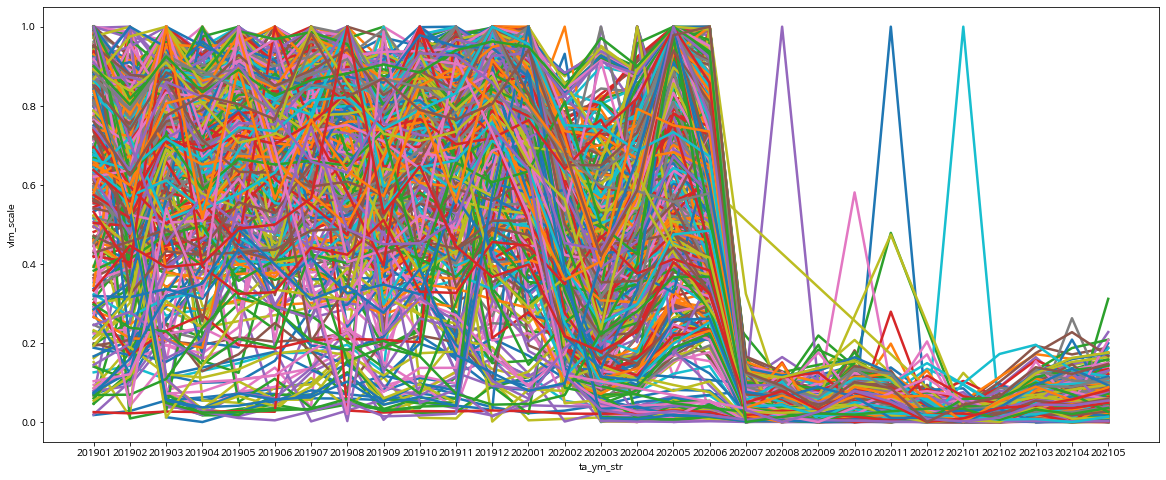

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#sns_plot = sns.lineplot(x='ta_ym',y='vlm_scale',ci=None,legend=None,hue='v1_gb2',data=x)

#sns_plot = sns.catplot(x='ta_ym',y='vlm_scale',hue='v1_gb2',kind='bar',legend=None,data=x);
#sns_plot = sns.PairGrid(x, y_vars="vlm_scale",
#                 x_vars='ta_ym',hue='v1_gb2')

plt.figure(figsize=(20,8))
sns_plot = sns.lineplot(data=x,x='ta_ym_str',y='vlm_scale',hue='v1_gb2', palette="tab10", linewidth=2.5,legend=None)

#sns_plot.fig.set_figwidth(20)
#sns_plot.fig.set_figheight(10)

In [ ]:
left_x_df = x[x.ta_ym < 202007].drop(columns=['ta_ym','ta_ym_str'])
right_x_df = x[x.ta_ym >= 202007].drop(columns=['ta_ym','ta_ym_str'])
left_x_df = left_x_df.groupby(left_x_df['v1_gb2']).mean()
right_x_df = right_x_df.groupby(right_x_df['v1_gb2']).mean()
x_df = pd.merge(left_x_df, right_x_df, on=left_x_df.index)
x_df['diff_vlm'], x_df['diff_usec'] = x_df.vlm_scale_x - x_df.vlm_scale_y, x_df.usec_scale_x - x_df.usec_scale_y
x_df = x_df.drop(columns=['vlm_x','usec_x',	'vlm_y',	'usec_y', 'vlm_scale_x',	'usec_scale_x',	'vlm_scale_y',	'usec_scale_y'])
x_df

,key_0,vlm_minmaxed_x,usec_minmaxed_x,vlm_minmaxed_y,usec_minmaxed_y,diff_vlm,diff_usec
0,강원_골프,0.653623,0.706569,0.099026,0.068217,0.554597,0.638352
1,강원_공연관람,0.629607,0.629159,0.031894,0.028712,0.597713,0.600447
2,강원_관광쇼핑,0.694071,0.724872,0.027005,0.040377,0.667065,0.684495
3,강원_교육훈련,0.818600,0.843220,0.020159,0.028882,0.798441,0.814338
4,강원_교통,0.566291,0.804200,0.018584,0.029033,0.547708,0.775167
...,...,...,...,...,...,...,...
471,충북_종교활동,0.707772,0.527061,0.056052,0.060227,0.651720,0.466834
472,충북_종합쇼핑,0.901077,0.874403,0.022036,0.023594,0.879041,0.850809
473,충북_체험,0.436865,0.525598,0.045802,0.059418,0.391063,0.466180
474,충북_패션쇼핑,0.751127,0.729427,0.031525,0.039480,0.719601,0.689947


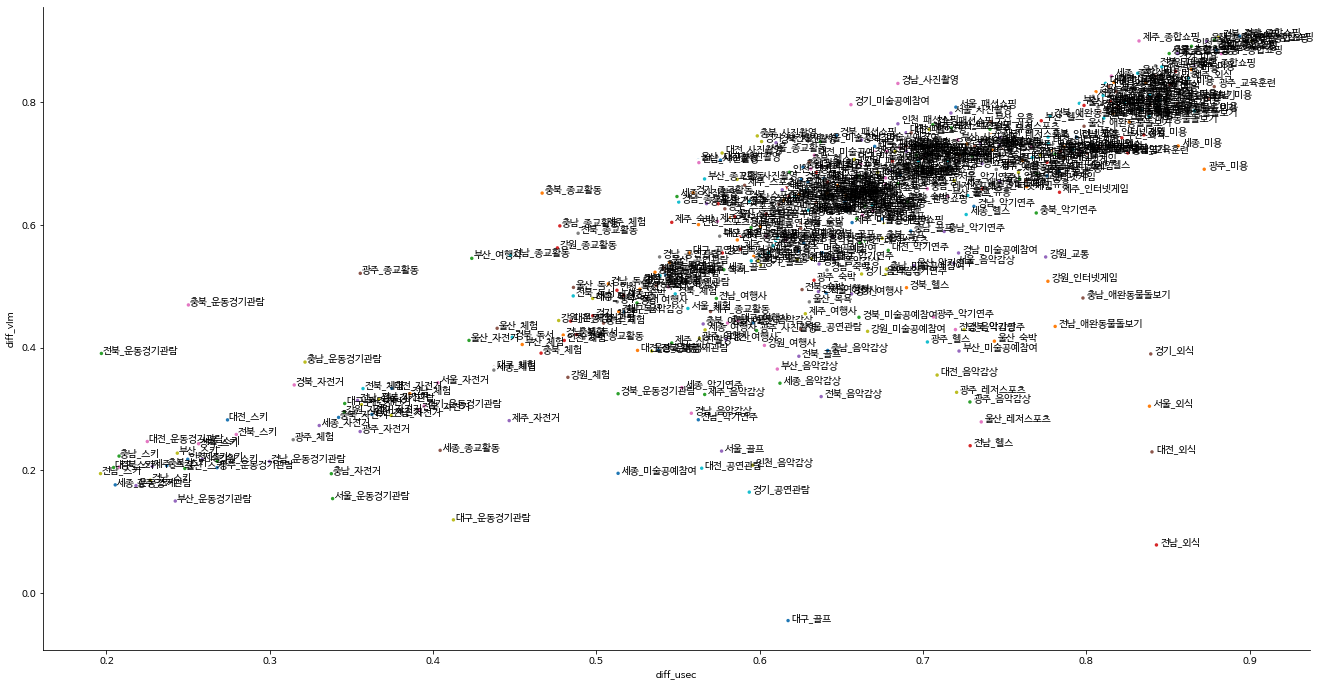

In [ ]:
sns_plot = sns.relplot(x='diff_usec',y='diff_vlm',hue='key_0',data=x_df, palette="tab10", linewidth=2.5,legend=None);
for n in range(x_df.shape[0]):
  plt.text(x_df['diff_usec'][n]*1.003, x_df['diff_vlm'][n]*1.003, x_df.key_0[n])
sns_plot.fig.set_figwidth(20)
sns_plot.fig.set_figheight(10)

In [ ]:
from sklearn.preprocessing import MinMaxScaler #StandardScaler

scaler = MinMaxScaler()
a_scaled = scaler.fit_transform(a)
a_scaled_df = pd.DataFrame(data=a_scaled, columns=a.columns,index=a.index)
a_scaled_df

,vlm_x,usec_x,vlm_y,usec_y
key_0,,,,
강원골프,0.009421,0.005110,0.009830,0.005162
강원공연관람,0.002844,0.007922,0.002192,0.004369
강원관광쇼핑,0.010761,0.005331,0.005276,0.003221
강원교육훈련,0.039047,0.006216,0.033445,0.005506
강원교통,0.045761,0.084289,0.024033,0.051965
...,...,...,...,...
충북종교활동,0.003799,0.001353,0.003264,0.001344
충북종합쇼핑,0.145475,0.154687,0.145603,0.153699
충북체험,0.002194,0.003422,0.001835,0.002815


In [ ]:
from sklearn.cluster import KMeans, DBSCAN
kmeans = KMeans(n_clusters=4)
#dbscan = DBSCAN(eos=0.2, min_samples=10, metric='euclidean')
predict = kmeans.fit_pred(a_scaled_df)


#군집나누고 scree plot으로 군집 갯수 정하고
#아까 나눈 지역별 데이터 나눠보고

In [ ]:
'''
for i in x['v1'].unique():

#from sklearn.preprocessing import MinMaxScaler #StandardScaler
#shin_df_1 = shin_df
#scaler = MinMaxScaler()

z_1 = pd.DataFrame({'a':[1,2],
                    'b':[1,2],
                    'c':[1,2]})
#z_1.loc[z_1.a >= 2,['b','c']]

#z_1['d'], z_1['e'] = [[0.        , 0.38353627],
#                      [0.25829086, 0.45597401]]

a = [[0.        , 0.38353627],
     [0.25829086, 0.45597401]]

a.extend(a)
print(a)
#z_1

#a = shin_df[shin_df.gb2 == '종합쇼핑'].groupby(['v1','ta_ym']).sum()
b = a.index
c = []
for i in range(len(b)):
  c.append(b[i][0])

c = set(c)
print(c)

print(shin_df['v1'].unique())

d = shin_df['ta_ym'].unique()
print(d)

from sklearn.preprocessing import MinMaxScaler #StandardScaler
shin_df_1 = shin_df
scaler = MinMaxScaler()
shin_df_1[(shin_df.v1 == '강원') & (shin_df.gb2 == '종합쇼핑') & (shin_df.ta_ym == 201901)].groupby(['v1','ta_ym']).sum()['vlm'].values
for i in shin_df['gb2'].unique():
  for j in shin_df['v1'].unique():
    for k in shin_df['ta_ym'].unique():
      shin_df_1[(shin_df.v1 == '강원') & (shin_df.gb2 == '종합쇼핑') & (shin_df.ta_ym == 201901)].groupby(['v1','ta_ym']).sum()['vlm'].values
       

for i in shin_df['gb2'].unique():
  for j in c:
'''

## 문화예술활동조사

### 원 데이터

In [ ]:
!pip install pyreadstat #spss 파일을 읽기 위한 pyreadstat install

     |████████████████████████████████| 2.5MB 30.3MB/s 


In [ ]:
art_df = pd.read_spss('/gdrive/MyDrive/data/2020 국민문화예술활동조사 데이터_공표용.sav')

In [ ]:
print('shape : ',art_df.shape)
print('\ninfo : ',art_df.info())
print('\ncolumns : ',art_df.columns)
print('----------------------------------------')

for i in art_df.columns:
  print(i,' : \n',art_df[i].unique())
  print('\n')

In [ ]:
art_df['q18_0'].isnull().sum() #30%역사문화유적지 방문

6326

In [ ]:
art_df['q12_4_n4'].isnull().sum()

9943

In [ ]:
#필요한 변수 선정
x = []
for i in art_df.columns.values:
  x.append(i.lower())
art_df.columns = x

a = '''PID
Q1_1
Q1_1_N2
Q1_1_N3
Q1_1_N4
Q1_1_N5
Q1_1_N6
Q1_1_N7
Q1_1_N8
Q1_1_N9
Q1_1_N10
Q1_1_N11
Q1_1_N11_M2
Q1_1_N11_M3
Q1_1_N11_M4
Q1_1_N11_M5
Q1_1_N11_M6
Q1_1_N11_M7
Q1_1_N11_M8
Q1_1_N11_M9
Q1_2_1
Q1_2_2
Q1_2_3
Q1_2_4
Q1_2_5
Q1_2_6
Q1_2_7
Q1_2_8
Q1_2_9
Q1_3
Q1_3_M2
Q1_3_M3
Q1_3_M4
Q1_3_M5
Q1_3_M6
Q1_3_M7
Q1_3_M8
Q1_3_M9
Q1_3_M10
Q2
Q3_1
Q3_6
Q3_7
Q3_8
Q4_1
Q4_1_N2
Q4_1_N3
Q4_1_N4
Q4_1_N5
Q4_1_N6
Q4_1_N7
Q4_1_N8
Q4_1_N9
Q4_1_N10
Q4_1_N11
Q4_1_N11_M2
Q4_1_N11_M3
Q4_1_N11_M4
Q4_1_N11_M5
Q4_1_N11_M6
Q4_1_N11_M7
Q4_1_N11_M8
Q4_1_N11_M9
Q4_1_N11_M10
Q4_2_1
Q4_2_1_M2
Q4_2_1_M3
Q4_2_1_M4
Q4_2_1_M5
Q4_3_1
Q4_2_1_N2
Q4_2_1_N2_M2
Q4_2_1_N2_M3
Q4_2_1_N2_M4
Q4_2_1_N2_M5
Q4_3_1_N2
Q4_2_1_N3
Q4_2_1_N3_M2
Q4_2_1_N3_M3
Q4_2_1_N3_M4
Q4_2_1_N3_M5
Q4_3_1_N3
Q4_2_1_N4
Q4_2_1_N4_M2
Q4_2_1_N4_M3
Q4_2_1_N4_M4
Q4_2_1_N4_M5
Q4_3_1_N4
Q4_2_1_N5
Q4_2_1_N5_M2
Q4_2_1_N5_M3
Q4_2_1_N5_M4
Q4_2_1_N5_M5
Q4_3_1_N5
Q4_2_1_N6
Q4_2_1_N6_M2
Q4_2_1_N6_M3
Q4_2_1_N6_M4
Q4_2_1_N6_M5
Q4_3_1_N6
Q4_2_1_N7
Q4_2_1_N7_M2
Q4_2_1_N7_M3
Q4_2_1_N7_M4
Q4_2_1_N7_M5
Q4_3_1_N7
Q4_2_1_N8
Q4_2_1_N8_M2
Q4_2_1_N8_M3
Q4_2_1_N8_M4
Q4_2_1_N8_M5
Q4_3_1_N8
Q4_2_1_N9
Q4_2_1_N9_M2
Q4_2_1_N9_M3
Q4_2_1_N9_M4
Q4_2_1_N9_M5
Q4_3_1_N9
Q4_4_1
Q4_4_2
Q4_4_3
Q4_4_4
Q4_4_5
Q4_4_6
Q4_4_7
Q4_4_8
Q4_4_9
Q5
Q7_1
Q7_1_M2
Q7_1_M3
Q7_2
Q7_2_M2
Q7_2_M3
Q18
Q18_0
Q18_1
Q18_1_M2
Q18_1_M3
Q18_1_M4
Q18_1_M5
Q18_1_M6
Q18_1_M7
Q18_1_M8
Q18_2
Q19
Q20
Q20_0
Q20_1
Q20_1_M2
Q20_1_M3
Q20_1_M4
Q20_1_M5
Q20_1_M6
Q20_1_M7
Q20_2
Q21
Q25
Q25_1
Q28
Q31_2
WT
DM1
DM2
DM8
DM9
DM11
DM11_1
DM12'''.lower().split('\n')
art_df[a]

,pid,q1_1,q1_1_n2,q1_1_n3,q1_1_n4,q1_1_n5,q1_1_n6,q1_1_n7,q1_1_n8,q1_1_n9,q1_1_n10,q1_1_n11,q1_1_n11_m2,q1_1_n11_m3,q1_1_n11_m4,q1_1_n11_m5,q1_1_n11_m6,q1_1_n11_m7,q1_1_n11_m8,q1_1_n11_m9,q1_2_1,q1_2_2,q1_2_3,q1_2_4,q1_2_5,q1_2_6,q1_2_7,q1_2_8,q1_2_9,q1_3,q1_3_m2,q1_3_m3,q1_3_m4,q1_3_m5,q1_3_m6,q1_3_m7,q1_3_m8,q1_3_m9,q1_3_m10,q2,...,q7_1_m2,q7_1_m3,q7_2,q7_2_m2,q7_2_m3,q18,q18_0,q18_1,q18_1_m2,q18_1_m3,q18_1_m4,q18_1_m5,q18_1_m6,q18_1_m7,q18_1_m8,q18_2,q19,q20,q20_0,q20_1,q20_1_m2,q20_1_m3,q20_1_m4,q20_1_m5,q20_1_m6,q20_1_m7,q20_2,q21,q25,q25_1,q28,q31_2,wt,dm1,dm2,dm8,dm9,dm11,dm11_1,dm12
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,영화,NaN,NaN,가 본 적이 있다,1.0,"종교유적지(사찰, 석불 등)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,⑥,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,해당 사항 없음,NaN,④보통,월평균 300만원 ~ 400만원 미만,5506.384316,남자,70세 이상,300-400만원,대도시,대구,북구,해당사항없음
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,영화,NaN,NaN,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,장애 등록,시각,④보통,월평균 200만원 ~ 300만원 미만,3967.696191,남자,40대,200-300만원,대도시,대구,북구,장애등록
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,문학(독서 포함),NaN,NaN,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,①전혀 없다,가 본 적이 있다,2.0,지역의 생태자연 체험(생태자연축제),지역의 특산물과 특산품 체험(지역특산물축제),NaN,NaN,NaN,NaN,NaN,⑤,⑥,해당 사항 없음,NaN,④보통,월평균 300만원 ~ 400만원 미만,5115.512259,여자,40대,300-400만원,대도시,대구,북구,해당사항없음
3,4.0,NaN,,NaN,,NaN,NaN,NaN,,NaN,,미술(사진·서예·건축·디자인 포함)전시회,"(4)전통예술(국악, 풍물, 민속극)",(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑦매우 만족 한다,NaN,⑥,NaN,NaN,NaN,⑤,NaN,(2)미술(사진·서예·건축·디자인 포함)전시회,"(4)전통예술(국악, 풍물, 민속극)",(6)뮤지컬,(8)영화,"(9)대중음악(가요콘서트), 연예",NaN,NaN,NaN,NaN,NaN,없다,...,영화,NaN,문학(독서 포함),영화,"대중음악(가요콘서트), 연예",가 본 적이 있다,2.0,"궁/능(궁궐, 왕릉 등)",성곽(산성 등),"종교유적지(사찰, 석불 등)","고대자연유산(동굴, 고인돌 등)",NaN,NaN,NaN,NaN,⑥,⑦매우 많다,가 본 적이 있다,3.0,공연·문화예술 체험(문화예술축제),지역의 전통역사 체험(전통문화축제),지역주민과의 화합/어울림 체험(주민화합축제),NaN,NaN,NaN,NaN,⑦매우 만족 한다,⑦매우 많다,해당 사항 없음,NaN,③,월평균 200만원 ~ 300만원 미만,5083.638944,여자,60대,200-300만원,읍면지역,충남,공주시,해당사항없음
4,5.0,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,,미술(사진·서예·건축·디자인 포함)전시회,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,NaN,NaN,NaN,NaN,NaN,⑥,NaN,(2)미술(사진·서예·건축·디자인 포함)전시회,(6)뮤지컬,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,...,미술(사진·서예·건축·디자인 포함),NaN,영화,"대중음악(가요콘서트), 연예",NaN,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,가 본 적이 있다,2.0,공연·문화예술 체험(문화예술축제),지역주민과의 화합/어울림 체험(주민화합축제),NaN,NaN,NaN,NaN,NaN,⑤,⑥,해당 사항 없음,NaN,⑥,월평균 200만원 ~ 300만원 미만,3031.421976,여자,30대,200-300만원,읍면지역,충남,공주시,해당사항없음
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10094,24023.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,NaN,,영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,NaN,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,...,영화,문학(독서 포함),뮤지컬,미술(사진·서예·건축·디자인 포함),"서양음악(클래식, 오페라, 서양악기 관련)",가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,④보통,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,해당 사항 없음,NaN,⑥,월평균 400만원 ~ 500만원 미만,5344.630399,여자,20대,400-500만원,대도시,부산,사상구,해당사항없음
10095,40011.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"대중음악(가요콘서트), 연예",NaN,영화,"대중음악(가요콘서트), 연예",문학(독서 포함),가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,해당 사항 없음,NaN,⑤,월평균 300만원 ~ 400만원 미만,3485.791708,여자,50대,300-400만원,중소도시,충북,상당구,해당사항없음
10096,53020.0,NaN,NaN,NaN,NaN,NaN,NaN,Na

### 사용할 데이터

In [ ]:
art_df[a].head(10) #사용할데이터 목록

,pid,q1_1,q1_1_n2,q1_1_n3,q1_1_n4,q1_1_n5,q1_1_n6,q1_1_n7,q1_1_n8,q1_1_n9,q1_1_n10,q1_1_n11,q1_1_n11_m2,q1_1_n11_m3,q1_1_n11_m4,q1_1_n11_m5,q1_1_n11_m6,q1_1_n11_m7,q1_1_n11_m8,q1_1_n11_m9,q1_2_1,q1_2_2,q1_2_3,q1_2_4,q1_2_5,q1_2_6,q1_2_7,q1_2_8,q1_2_9,q1_3,q1_3_m2,q1_3_m3,q1_3_m4,q1_3_m5,q1_3_m6,q1_3_m7,q1_3_m8,q1_3_m9,q1_3_m10,q2,...,q7_1_m2,q7_1_m3,q7_2,q7_2_m2,q7_2_m3,q18,q18_0,q18_1,q18_1_m2,q18_1_m3,q18_1_m4,q18_1_m5,q18_1_m6,q18_1_m7,q18_1_m8,q18_2,q19,q20,q20_0,q20_1,q20_1_m2,q20_1_m3,q20_1_m4,q20_1_m5,q20_1_m6,q20_1_m7,q20_2,q21,q25,q25_1,q28,q31_2,wt,dm1,dm2,dm8,dm9,dm11,dm11_1,dm12
0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,영화,NaN,NaN,가 본 적이 있다,1.0,"종교유적지(사찰, 석불 등)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,⑥,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,해당 사항 없음,NaN,④보통,월평균 300만원 ~ 400만원 미만,5506.384316,남자,70세 이상,300-400만원,대도시,대구,북구,해당사항없음
1,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,영화,NaN,NaN,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,장애 등록,시각,④보통,월평균 200만원 ~ 300만원 미만,3967.696191,남자,40대,200-300만원,대도시,대구,북구,장애등록
2,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,문학(독서 포함),NaN,NaN,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,①전혀 없다,가 본 적이 있다,2.0,지역의 생태자연 체험(생태자연축제),지역의 특산물과 특산품 체험(지역특산물축제),NaN,NaN,NaN,NaN,NaN,⑤,⑥,해당 사항 없음,NaN,④보통,월평균 300만원 ~ 400만원 미만,5115.512259,여자,40대,300-400만원,대도시,대구,북구,해당사항없음
3,4.0,NaN,,NaN,,NaN,NaN,NaN,,NaN,,미술(사진·서예·건축·디자인 포함)전시회,"(4)전통예술(국악, 풍물, 민속극)",(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑦매우 만족 한다,NaN,⑥,NaN,NaN,NaN,⑤,NaN,(2)미술(사진·서예·건축·디자인 포함)전시회,"(4)전통예술(국악, 풍물, 민속극)",(6)뮤지컬,(8)영화,"(9)대중음악(가요콘서트), 연예",NaN,NaN,NaN,NaN,NaN,없다,...,영화,NaN,문학(독서 포함),영화,"대중음악(가요콘서트), 연예",가 본 적이 있다,2.0,"궁/능(궁궐, 왕릉 등)",성곽(산성 등),"종교유적지(사찰, 석불 등)","고대자연유산(동굴, 고인돌 등)",NaN,NaN,NaN,NaN,⑥,⑦매우 많다,가 본 적이 있다,3.0,공연·문화예술 체험(문화예술축제),지역의 전통역사 체험(전통문화축제),지역주민과의 화합/어울림 체험(주민화합축제),NaN,NaN,NaN,NaN,⑦매우 만족 한다,⑦매우 많다,해당 사항 없음,NaN,③,월평균 200만원 ~ 300만원 미만,5083.638944,여자,60대,200-300만원,읍면지역,충남,공주시,해당사항없음
4,5.0,NaN,,NaN,NaN,NaN,NaN,NaN,,NaN,,미술(사진·서예·건축·디자인 포함)전시회,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,NaN,NaN,NaN,NaN,NaN,⑥,NaN,(2)미술(사진·서예·건축·디자인 포함)전시회,(6)뮤지컬,(8)영화,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,...,미술(사진·서예·건축·디자인 포함),NaN,영화,"대중음악(가요콘서트), 연예",NaN,가 본 적이 없다,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,가 본 적이 있다,2.0,공연·문화예술 체험(문화예술축제),지역주민과의 화합/어울림 체험(주민화합축제),NaN,NaN,NaN,NaN,NaN,⑤,⑥,해당 사항 없음,NaN,⑥,월평균 200만원 ~ 300만원 미만,3031.421976,여자,30대,200-300만원,읍면지역,충남,공주시,해당사항없음
5,6.0,NaN,NaN,NaN,,NaN,NaN,NaN,NaN,NaN,,"전통예술(국악, 풍물, 민속극)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑦매우 만족 한다,NaN,NaN,NaN,NaN,NaN,"(4)전통예술(국악, 풍물, 민속극)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,없다,...,NaN,NaN,"전통예술(국악, 풍물, 민속극)",NaN,NaN,가 본 적이 있다,2.0,"궁/능(궁궐, 왕릉 등)",성곽(산성 등),"종교유적지(사찰, 석불 등)","고대자연유산(동굴, 고인돌 등)",NaN,NaN,NaN,NaN,⑥,⑥,가 본 적이 있다,1.0,지역의 전통역사 체험(전통문화축제),NaN,NaN,NaN,NaN,NaN,NaN,⑤,⑥,해당 사항 없음,NaN,⑥,월평균 200만원 ~ 300만원 미만,5208.507946,남자,70세 이상,200-300만원,읍면지역,충남,공주시,해당사항없음
6,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"(1)문학행사(시화전, 도서전시회, 작가와의 대화)","(9)대중음악(가요콘서트), 연예",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,영화,"대중음악(가요콘서트), 연예",NaN,가 본 적이 있다,1.0,"궁/능(궁궐, 왕릉 등)",NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑤,③,가 본 적이 있다,2.0,공연·문화예술 체험(문화예술축제),지역의 전통역사 체험(전통문화축제),지역주민과의 화합/어울림 체험(주민화합축제),NaN,NaN,NaN,NaN,⑤,⑥,장애 등록,지체,②,월평균 200만원 ~ 300만원 미만,9303.093980,남자,60대,200-300만원,읍면지역,충남,공주시,장애등록
7,8.0,NaN,,NaN,NaN,NaN,NaN,NaN,NaN,NaN,,미술(사진·서예·건축·디자인 포함)전시회,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,⑥,NaN,NaN,NaN,NaN,NaN,NaN,NaN,(2)미술(사진·서예·건축·디자인 포함)전시회,(5)연극,(8)영화,"(9)대중음악(가요콘서트), 연예",NaN,NaN,NaN,NaN,NaN,NaN,있다,...,NaN,NaN,영화

In [ ]:
print('shape : ',art_df.shape)
print('\ninfo : ',art_df.info())
print('\ncolumns : ',art_df.columns)
print('----------------------------------------')

for i in art_df.columns:
  print(i,' : \n',art_df[i].unique())
  print('Count Null : ',art_df[i].isnull().sum())
  print('\n')
  print('=========================================================')

shape :  (10099, 404)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10099 entries, 0 to 10098
Columns: 404 entries, pid to dm12
dtypes: category(395), float64(9)
memory usage: 4.6 MB

info :  None

columns :  Index(['pid', 'q1_1', 'q1_1_n2', 'q1_1_n3', 'q1_1_n4', 'q1_1_n5', 'q1_1_n6',
       'q1_1_n7', 'q1_1_n8', 'q1_1_n9',
       ...
       'dm4', 'dm5', 'dm6', 'dm7', 'dm8', 'dm9', 'dm10', 'dm11', 'dm11_1',
       'dm12'],
      dtype='object', length=404)
----------------------------------------
pid  : 
 [1.0000e+00 2.0000e+00 3.0000e+00 ... 5.3020e+04 8.5004e+04 9.7681e+04]
Count Null :  0


q1_1  : 
 [NaN, '']
Categories (1, object): ['']
Count Null :  9847


q1_1_n2  : 
 [NaN, '']
Categories (1, object): ['']
Count Null :  9261


q1_1_n3  : 
 [NaN, '']
Categories (1, object): ['']
Count Null :  9886


q1_1_n4  : 
 [NaN, '']
Categories (1, object): ['']
Count Null :  9785


q1_1_n5  : 
 [NaN, '']
Categories (1, object): ['']
Count Null :  9515


q1_1_n6  : 
 [NaN, '']
Categorie

## 국민 여가활동조사

### 원 데이터

In [ ]:
rest_df = pd.read_spss('/gdrive/MyDrive/data/1. 2020년 국민여가활동조사데이터_공표용.sav')

In [ ]:
print('shape : ',rest_df.shape)
print('\ninfo : ',rest_df.info())
print('\ncolumns : ',rest_df.columns)
print('----------------------------------------')

for i in rest_df.columns:
  print(i,' : \n',rest_df[i].unique())
  print('\n')

shape :  (10088, 364)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10088 entries, 0 to 10087
Columns: 364 entries, ID to DM12
dtypes: category(341), float64(21), object(2)
memory usage: 5.2+ MB

info :  None

columns :  Index(['ID', 'q1_A', 'q1_A_m2', 'q1_A_m3', 'q1_A_m4', 'q1_A_m5', 'q1_A_m6',
       'q1_A_m7', 'q1_A_m8', 'q1_A_m9',
       ...
       'DM4', 'DM5', 'DM6', 'DM7', 'DM8', 'DM9', 'DM10', 'DM11', 'DM11_1',
       'DM12'],
      dtype='object', length=364)
----------------------------------------
ID  : 
 [2.0000e+00 4.0000e+00 5.0000e+00 ... 1.5007e+04 1.5009e+04 1.5010e+04]


q1_A  : 
 ['보기 중 경험한 활동 없음', '전시회 관람 (미술, 사진, 건축, 디자인 등)', NaN]
Categories (2, object): ['보기 중 경험한 활동 없음', '전시회 관람 (미술, 사진, 건축, 디자인 등)']


q1_A_m2  : 
 [NaN, '박물관 관람']
Categories (1, object): ['박물관 관람']


q1_A_m3  : 
 [NaN, '음악연주회 관람 (클래식, 오페라 등)']
Categories (1, object): ['음악연주회 관람 (클래식, 오페라 등)']


q1_A_m4  : 
 [NaN, '전통예술공연 관람 (국악, 민속놀이 등)']
Categories (1, object): ['전통예술공연 관람 (국악, 민속놀이 등)']


q

In [ ]:
# 19년과 20년 최근 참여한 순위별 비교를 통해 영향을 받은 것과 안 받은거 구분(순위별 가중치 부여)

In [ ]:
x = [] #필요 데이터 선정
for i in rest_df.columns.values:
  x.append(i.lower())
rest_df.columns = x

a = '''ID
Q1_A
Q1_A_M2
Q1_A_M3
Q1_A_M4
Q1_A_M5
Q1_A_M6
Q1_A_M7
Q1_A_M8
Q1_A_M9
Q1_B
Q1_B_M2
Q1_B_M3
Q1_B_M4
Q1_B_M5
Q1_B_M6
Q1_B_M7
Q1_B_M8
Q1_C
Q1_C_M2
Q1_C_M3
Q1_C_M4
Q1_C_M5
Q1_D
Q1_D_M2
Q1_D_M3
Q1_D_M4
Q1_D_M5
Q1_D_M6
Q1_D_M7
Q1_D_M8
Q1_D_M9
Q1_D_M10
Q1_D_M11
Q1_D_M12
Q1_D_M13
Q1_D_M14
Q1_D_M15
Q1_D_M16
Q1_D_M17
Q1_D_M18
Q1_D_M19
Q1_E
Q1_E_M2
Q1_E_M3
Q1_E_M4
Q1_E_M5
Q1_E_M6
Q1_E_M7
Q1_E_M8
Q1_E_M9
Q1_E_M10
Q1_E_M11
Q1_E_M12
Q1_F
Q1_F_M2
Q1_F_M3
Q1_F_M4
Q1_F_M5
Q1_F_M6
Q1_F_M7
Q1_F_M8
Q1_F_M9
Q1_F_M10
Q1_F_M11
Q1_F_M12
Q1_F_M13
Q1_F_M14
Q1_F_M15
Q1_F_M16
Q1_F_M17
Q1_F_M18
Q1_F_M19
Q1_F_M20
Q1_F_M21
Q1_F_M22
Q1_F_M23
Q1_G
Q1_G_M2
Q1_G_M3
Q1_G_M4
Q1_G_M5
Q1_G_M6
Q1_G_M7
Q1_G_M8
Q1_G_M9
Q1_G_M10
Q1_H
Q1_H_M2
Q1_H_M3
Q1_H_M4
Q1_H_M5
Q1_H_M6
Q1_H_M7
Q1_H_M8
Q1_H_M9
Q1_H_M10
Q2_1_N2
Q2_1_N2_M2
Q2_1_N2_M3
Q2_1_N2_M4
Q2_1_N2_M5
Q2_3_1
Q2_4_1
Q2_4_1_N2
Q2_5_1
Q2_6_1
Q2_3_2
Q2_4_2
Q2_4_2_N2
Q2_5_2
Q2_6_2
Q2_3_3
Q2_4_3
Q2_4_3_N2
Q2_5_3
Q2_6_3
Q2_3_4
Q2_4_4
Q2_4_4_N2
Q2_5_4
Q2_6_4
Q2_3_5
Q2_4_5
Q2_4_5_N2
Q2_5_5
Q2_6_5
Q3
Q4
Q4_M2
Q4_M3
Q5
Q9
Q9_1
Q10
Q16
Q16_M2
Q16_M3
Q17
Q17_M2
Q17_M3
Q18_1
Q18_2
Q18_3
Q18_4
Q19
Q20
Q21_1
Q21_2
Q21_3
Q24_1
Q24_2
Q25
Q26_1
Q26_2
Q26_3
Q26_4
Q26_5
Q26_6
Q26_7
Q26_1_N2
Q26_1_N2_M2
Q26_1_N2_M3
Q27_1
Q27_2
Q27_3
Q27_4
Q27_5
Q27_6
Q27_7
Q29_1
Q29_1_M2
Q30
Q30_1
Q33
Q34
Q35_1
Q35_2
Q35_3
Q35_4
Q35_5
Q41
Q43_2
Q49_1
Q49_2
WT
DM1
DM2
DM8
DM9
DM10
DM11
DM11_1
DM12'''.lower().split('\n')

### 사용할 데이터

In [ ]:
rest_df[a].head(10) #사용할데이터 목록

,id,q1_a,q1_a_m2,q1_a_m3,q1_a_m4,q1_a_m5,q1_a_m6,q1_a_m7,q1_a_m8,q1_a_m9,q1_b,q1_b_m2,q1_b_m3,q1_b_m4,q1_b_m5,q1_b_m6,q1_b_m7,q1_b_m8,q1_c,q1_c_m2,q1_c_m3,q1_c_m4,q1_c_m5,q1_d,q1_d_m2,q1_d_m3,q1_d_m4,q1_d_m5,q1_d_m6,q1_d_m7,q1_d_m8,q1_d_m9,q1_d_m10,q1_d_m11,q1_d_m12,q1_d_m13,q1_d_m14,q1_d_m15,q1_d_m16,q1_d_m17,...,q26_2,q26_3,q26_4,q26_5,q26_6,q26_7,q26_1_n2,q26_1_n2_m2,q26_1_n2_m3,q27_1,q27_2,q27_3,q27_4,q27_5,q27_6,q27_7,q29_1,q29_1_m2,q30,q30_1,q33,q34,q35_1,q35_2,q35_3,q35_4,q35_5,q41,q43_2,q49_1,q49_2,wt,dm1,dm2,dm8,dm9,dm10,dm11,dm11_1,dm12
0,2.0,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,사이클링/산악자전거,NaN,...,6,7 매우 중요하다,6,6,6,4 보통이다,여가와 관련한 전문인력을 양성 및 배치,다양한 여가시설,소외계층을 위한 여가생활을 지원,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,3,3,"의무활동시간(업무, 학업)을 늘릴 것이다",NaN,5,NaN,8,6,7 매우 영향을 끼친다,6,6,2,4 보통,64.0,여자,100만원 미만,100만원 ~ 200만원 미만,6804.636670,여성,60대,100~200만원,읍면지역,충청/세종권,충북,진천군,해당사항없음
1,4.0,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7 매우 중요하다,7 매우 중요하다,6,6,4 보통이다,4 보통이다,질 좋은 여가프로그램을 개발 및 보급,다양한 여가시설,여가와 관련한 전문인력을 양성 및 배치,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,여가시간을 늘릴 것이다,NaN,4 보통,여가를 함께 즐길 사람이 없어서,5,6,6,7 매우 영향을 끼친다,7 매우 영향을 끼친다,7 매우 영향을 끼친다,7 매우 영향을 끼친다,81.0,남자,100만원 미만,100만원 ~ 200만원 미만,5624.078296,남성,70세 이상,100~200만원,읍면지역,충청/세종권,충북,진천군,장애등록
2,5.0,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,5,4 보통이다,4 보통이다,4 보통이다,4 보통이다,다양한 여가시설,질 좋은 여가프로그램을 개발 및 보급,여가와 관련한 전문인력을 양성 및 배치,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,"의무활동시간(업무, 학업)을 늘릴 것이다",NaN,5,NaN,6,3,5,7 매우 영향을 끼친다,6,6,7 매우 영향을 끼친다,77.0,남자,100만원 미만,100만원 ~ 200만원 미만,5624.078296,남성,70세 이상,100~200만원,읍면지역,충청/세종권,충북,진천군,해당사항없음
3,6.0,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,6,6,6,6,6,다양한 여가시설,질 좋은 여가프로그램을 개발 및 보급,소외계층을 위한 여가생활을 지원,4 보통이다,4 보통이다,4 보통이다,3,4 보통이다,3,4 보통이다,여가시간을 늘릴 것이다,NaN,5,NaN,8,6,6,7 매우 영향을 끼친다,5,5,6,73.0,여자,100만원 미만,100만원 ~ 200만원 미만,6250.367621,여성,70세 이상,100~200만원,읍면지역,충청/세종권,충북,진천군,해당사항없음
4,13.0,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,5,5,4 보통이다,6,4 보통이다,4 보통이다,소외계층을 위한 여가생활을 지원,다양한 여가시설,질 좋은 여가프로그램을 개발 및 보급,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,여가시간을 늘릴 것이다,NaN,5,NaN,6,3,6,7 매우 영향을 끼친다,6,6,7 매우 영향을 끼친다,81.0,여자,100만원 미만,100만원 미만,3125.183811,여성,70세 이상,100만원 미만,읍면지역,충청/세종권,충북,진천군,장애등록
5,16.0,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"스포츠 경기 간접관람- TV, DMB를 통한관람 (축구, 야구, 농구, 배구 등)",NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,7 매우 중요하다,5,5,7 매우 중요하다,6,6,다양한 여가시설,질 좋은 여가프로그램을 개발 및 보급,소외계층을 위한 여가생활을 지원,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,4 보통이다,"의무활동시간(업무, 학업)을 늘릴 것이다",NaN,4 보통,경제적 부담 때문에,5,4 보통,6,7 매우 영향을 끼친다,5,3,4 보통,68.0,남자,100만원 ~ 200만원 미만,100만원 ~ 200만원 미만,1609.947255,남성,60대,100~200만원,읍면지역,충청/세종권,충북,진천군,장애등록
6,20.0,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,보기 중 경험한 활동 없음,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,6,6,5,6,5,5,다양한 여가시설,질 좋은 여가프로그램을 개발 및 보급,소외계층을 위한 여가생활을 지원,5,5,5,4 보통이다,4 보통이다,4 보통이다,4 보통이다,"의무활동시간(업무, 학업)을 늘릴 것이다",NaN,4 보통,경제적 부담 때문에,7,5,6,7 매우 영향을 끼친다,6,6,4 보통,77.0,남자,100만원 ~ 200만원 미만,100만원 ~ 200만원 미만,5624.078296,남성,70세 이상,100~200만원,읍면지역,충청/세종권,충북,진천

In [ ]:
print('shape : ',rest_df.shape)
print('\ninfo : ',rest_df.info())
print('\ncolumns : ',rest_df.columns)
print('----------------------------------------')



for i in rest_df.columns:
  print(i,' : \n',rest_df[i].unique())
  print('\n')
  print(rest_df[i].isnull().sum())
  print('=========================================================')

shape :  (10088, 364)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10088 entries, 0 to 10087
Columns: 364 entries, id to dm12
dtypes: category(341), float64(21), object(2)
memory usage: 5.2+ MB

info :  None

columns :  Index(['id', 'q1_a', 'q1_a_m2', 'q1_a_m3', 'q1_a_m4', 'q1_a_m5', 'q1_a_m6',
       'q1_a_m7', 'q1_a_m8', 'q1_a_m9',
       ...
       'dm4', 'dm5', 'dm6', 'dm7', 'dm8', 'dm9', 'dm10', 'dm11', 'dm11_1',
       'dm12'],
      dtype='object', length=364)
----------------------------------------
id  : 
 [2.0000e+00 4.0000e+00 5.0000e+00 ... 1.5007e+04 1.5009e+04 1.5010e+04]


q1_a  : 
 ['보기 중 경험한 활동 없음', '전시회 관람 (미술, 사진, 건축, 디자인 등)', NaN]
Categories (2, object): ['보기 중 경험한 활동 없음', '전시회 관람 (미술, 사진, 건축, 디자인 등)']


q1_a_m2  : 
 [NaN, '박물관 관람']
Categories (1, object): ['박물관 관람']


q1_a_m3  : 
 [NaN, '음악연주회 관람 (클래식, 오페라 등)']
Categories (1, object): ['음악연주회 관람 (클래식, 오페라 등)']


q1_a_m4  : 
 [NaN, '전통예술공연 관람 (국악, 민속놀이 등)']
Categories (1, object): ['전통예술공연 관람 (국악, 민속놀이 등)']


q